# Twitter consumer reviews

- LINKS
   API: https://docs.tweepy.org/en/stable/
  
- Libraries : https://pandas.pydata.org/    https://seaborn.pydata.org/


In [1]:
import tweepy as tw
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bearer_token = 'add_your_key'
consumer_key = 'add_your_key'
consumer_secret = 'add_your_key'
access_token = 'add_your_key2'
access_token_secret = 'add_your_key'

In [4]:
cliente = tw.Client(bearer_token=bearer_token, consumer_key=consumer_key, consumer_secret=consumer_secret, access_token=access_token, access_token_secret=access_token_secret)

# 11/02/22

In [5]:
start11 = '2022-02-11T06:39:01Z'
end11 = '2022-02-11T23:40:01Z'

In [6]:
resposta11 = cliente.search_recent_tweets(query='@kibonbr',max_results=100,start_time=start11,end_time=end11)

In [7]:
resposta11

Response(data=[<Tweet id=1492260218016833539 text=@faxinaboa @kibonbr Família linda❤️>, <Tweet id=1492256677546110984 text=@faxinaboa @kibonbr que delicia! deu vontade aqui 😋>, <Tweet id=1492256126028722176 text=@faxinaboa @kibonbr Eita>, <Tweet id=1492256028179709952 text=@josinaldolins @kibonbr Limao, abacaxi e morango.>, <Tweet id=1492251607051997186 text=@faxinaboa @kibonbr É de limão?>, <Tweet id=1492251409013694465 text=@kakasardinha @kibonbr Sim hhahahahahhahah>, <Tweet id=1492251217384333319 text=@faxinaboa @kibonbr Azeitoninha tá tão crescida a tirou foto de todo mundo>, <Tweet id=1492250257001963520 text=@faxinaboa @kibonbr Esse sorvete é maravilhoso!!>, <Tweet id=1492249559782809606 text=E a @kibonbr que alegrou essa família enviando joguinho e Twister pra gente ser feliz? #recebidos amor https://t.co/wcNn9KmfQs>, <Tweet id=1492204756948987907 text=Era só um Tablito agora @kibonbr 😋😋😋>, <Tweet id=1492203553804402688 text=@kibonbr eo eskibon>, <Tweet id=1492203517687255044 te

In [8]:
dados11 = resposta11.data

In [9]:
base11 = []

In [10]:
for i in dados11:
    
    linha11 = [0 for j in range (22)]
    
    linha11[0] = i.text
    
    texto11 = i.text
    
    if('RT' in texto11):
        posicao11 =texto11.find(':')
        texto11 = texto11[posicao11+2:]
        linha11[21] = 1
        
    linha11[1] = 1 if ('delicia' in texto11.lower() or 'delícia' in texto11.lower() or 'Delícia'in texto11.lower() or 'Delicia' in texto11.lower()) else 0
    linha11[2] = 1 if ('limão' in texto11.lower() or 'limao' in texto11.lower() or 'Limao' in texto11.lower() or 'Limão' in texto11.lower()) else 0
    linha11[3] = 1 if ('abacaxi' in texto11.lower()) else 0
    linha11[4] = 1 if ('morango' in texto11.lower()) else 0
    linha11[5] = 1 if ('Tablito' in texto11.lower()) else 0
    linha11[6] = 1 if ('eskibon' in texto11.lower()) else 0
    linha11[7] = 1 if ('brigadeiro' in texto11.lower()) else 0
    linha11[8] = 1 if ('azedou' in texto11.lower()) else 0
    linha11[9] = 1 if ('alegrou' in texto11.lower()) else 0
    linha11[10] = 1 if ('maravilhoso' in texto11.lower()) else 0
    linha11[11] = 1 if ('LACTOSE' in texto11.lower() or 'Lactose' in texto11.lower() or 'lactose' in texto11.lower()) else 0
    linha11[12] = 1 if ('Magnum' in texto11.lower() or 'MAGNUM' in texto11.lower() or 'magnum' in texto11.lower()) else 0
    linha11[13] = 1 if ('vegano' in texto11.lower() or 'vegana' in texto11.lower()) else 0
    linha11[14] = 1 if ('intolerante' in texto11.lower()) else 0
    linha11[15] = 1 if ('sem gosto' in texto11.lower()) else 0
    linha11[16] = 1 if ('caro' in texto11.lower()) else 0
    linha11[17] = 1 if ('Chicabon' in texto11.lower()) else 0
    linha11[18] = 1 if ('cremosissimo' in texto11.lower() or 'creme' in texto11.lower() or 'napolitano' in texto11.lower() or 'flocos' in texto11.lower()) else 0
    linha11[19] = 1 if ('picole' in texto11.lower()) else 0
    linha11[20] = 1 if ('hello kitty' in texto11.lower()) else 0

        
    base11.append(linha11)

In [11]:
base11_t = pd.DataFrame(base11)
base11_t.columns = ['texto','delicia','limao','abacaxi','morango',
                  'tablito','eskibon','brigadeiro','azedou','alegrou',
                  'maravilhoso','lactose','magnum','vegano','intolerante','creme','sem gosto','chicabom',
                  'cremosissimo','picole','hello kitty','RT']

In [12]:
base11_t

,texto,delicia,limao,abacaxi,morango,tablito,eskibon,brigadeiro,azedou,alegrou,...,magnum,vegano,intolerante,creme,sem gosto,chicabom,cremosissimo,picole,hello kitty,RT
0,@faxinaboa @kibonbr Família linda❤️,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,@faxinaboa @kibonbr que delicia! deu vontade a...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,@faxinaboa @kibonbr Eita,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"@josinaldolins @kibonbr Limao, abacaxi e morango.",0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,@faxinaboa @kibonbr É de limão?,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,@kakasardinha @kibonbr Sim hhahahahahhahah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,@faxinaboa @kibonbr Azeitoninha tá tão crescid...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,@faxinaboa @kibonbr Esse sorvete é maravilhoso!!,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,E a @kibonbr que alegrou essa família enviando...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Era só um Tablito agora @kibonbr 😋😋😋,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 12/02/22

In [13]:
start12 = '2022-02-12T06:39:01Z'
end12 = '2022-02-12T23:40:01Z'

In [14]:
resposta12 = cliente.search_recent_tweets(query='@kibonbr',max_results=100,start_time=start12,end_time=end12)
dados12 = resposta12.data

In [15]:
resposta12

Response(data=[<Tweet id=1492568913233776648 text=@kibonbr fui comer um sorvete p melhorar meu sabadão e olha oq aconteceu, não estava lacrado direito e ainda azedou, valeu ein https://t.co/s8LEQqWvgC>, <Tweet id=1492517673233797125 text=RT @kibonbr: @DonwPlays 😋❤️>, <Tweet id=1492510796328415232 text=@kibonbr Também é>, <Tweet id=1492510581324136453 text=@kibonbr ESKIBON AAAAAAAAAA>], includes={}, errors=[], meta={'newest_id': '1492568913233776648', 'oldest_id': '1492510581324136453', 'result_count': 4})

In [16]:
base12 = []

In [17]:
for i in dados12:
    linha12 = [0 for j in range (22)]
    linha12[0] = i.text
    
    texto12 = i.text
    if('RT' in texto12):
        posicao12 =texto12.find(':')
        texto12 = texto12[posicao12+2:]
        linha12[21] = 1
        
    linha12[1] = 1 if ('delicia' in texto12.lower() or 'delícia' in texto12.lower() or 'Delícia'in texto12.lower() or 'Delicia' in texto12.lower()) else 0
    linha12[2] = 1 if ('limão' in texto12.lower() or 'limao' in texto12.lower() or 'Limao' in texto12.lower() or 'Limão' in texto12.lower()) else 0
    linha12[3] = 1 if ('abacaxi' in texto12.lower()) else 0
    linha12[4] = 1 if ('morango' in texto12.lower()) else 0
    linha12[5] = 1 if ('Tablito' in texto12.lower()) else 0
    linha12[6] = 1 if ('eskibon' in texto12.lower()) else 0
    linha12[7] = 1 if ('brigadeiro' in texto12.lower()) else 0
    linha12[8] = 1 if ('azedou' in texto12.lower()) else 0
    linha12[9] = 1 if ('alegrou' in texto12.lower()) else 0
    linha12[10] = 1 if ('maravilhoso' in texto12.lower()) else 0
    linha12[11] = 1 if ('LACTOSE' in texto12.lower() or 'Lactose' in texto12.lower() or 'lactose' in texto12.lower()) else 0
    linha12[12] = 1 if ('Magnum' in texto12.lower() or 'MAGNUM' in texto12.lower() or 'magnum' in texto12.lower()) else 0
    linha12[13] = 1 if ('vegano' in texto12.lower() or 'vegana' in texto12.lower()) else 0
    linha12[14] = 1 if ('intolerante' in texto12.lower()) else 0
    linha12[15] = 1 if ('sem gosto' in texto12.lower()) else 0
    linha12[16] = 1 if ('caro' in texto12.lower()) else 0
    linha12[17] = 1 if ('Chicabon' in texto12.lower()) else 0
    linha12[18] = 1 if ('cremosissimo' in texto12.lower() or 'creme' in texto12.lower() or 'napolitano' in texto12.lower() or 'flocos' in texto12.lower()) else 0
    linha12[19] = 1 if ('picole' in texto12.lower()) else 0
    linha12[20] = 1 if ('hello kitty' in texto12.lower()) else 0
     
        
    base12.append(linha12)

In [18]:
base12_t = pd.DataFrame(base12)
base12_t.columns = ['texto','delicia','limao','abacaxi','morango',
                  'tablito','eskibon','brigadeiro','azedou','alegrou',
                  'maravilhoso','lactose','magnum','vegano','intolerante','creme','sem gosto','chicabom',
                  'cremosissimo','picole','hello kitty','RT']

In [19]:
base12_t

,texto,delicia,limao,abacaxi,morango,tablito,eskibon,brigadeiro,azedou,alegrou,...,magnum,vegano,intolerante,creme,sem gosto,chicabom,cremosissimo,picole,hello kitty,RT
0,@kibonbr fui comer um sorvete p melhorar meu s...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,RT @kibonbr: @DonwPlays 😋❤️,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,@kibonbr Também é,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,@kibonbr ESKIBON AAAAAAAAAA,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 13/02/22

In [20]:
start13 = '2022-02-13T06:39:01Z'
end13 = '2022-02-13T23:40:01Z'

In [21]:
resposta13 = cliente.search_recent_tweets(query='@kibonbr',max_results=100,start_time=start13,end_time=end13)
dados13 = resposta13.data

In [22]:
dados13

[<Tweet id=1492897393620230152 text=kibon lacraste #kibonderretebarreiras 
 @kibonbr https://t.co/EUXoaGvuoc>]

In [23]:
base13 = []

In [24]:
for i in dados13:
    linha13 = [0 for j in range (22)]
    linha13[0] = i.text
    
    texto13 = i.text
    if('RT' in texto13):
        posicao13 =texto13.find(':')
        texto13 = texto13[posicao13+2:]
        linha13[21] = 1
    
    linha13[1] = 1 if ('delicia' in texto13.lower() or 'delícia' in texto13.lower() or 'Delícia'in texto13.lower() or 'Delicia' in texto13.lower()) else 0
    linha13[2] = 1 if ('limão' in texto13.lower() or 'limao' in texto13.lower() or 'Limao' in texto13.lower() or 'Limão' in texto13.lower()) else 0
    linha13[3] = 1 if ('abacaxi' in texto13.lower()) else 0
    linha13[4] = 1 if ('morango' in texto13.lower()) else 0
    linha13[5] = 1 if ('Tablito' in texto13.lower()) else 0
    linha13[6] = 1 if ('eskibon' in texto13.lower()) else 0
    linha13[7] = 1 if ('brigadeiro' in texto13.lower()) else 0
    linha13[8] = 1 if ('azedou' in texto13.lower()) else 0
    linha13[9] = 1 if ('alegrou' in texto13.lower()) else 0
    linha13[10] = 1 if ('maravilhoso' in texto13.lower()) else 0
    linha13[11] = 1 if ('LACTOSE' in texto13.lower() or 'Lactose' in texto13.lower() or 'lactose' in texto13.lower()) else 0
    linha13[12] = 1 if ('Magnum' in texto13.lower() or 'MAGNUM' in texto13.lower() or 'magnum' in texto13.lower()) else 0
    linha13[13] = 1 if ('vegano' in texto13.lower() or 'vegana' in texto13.lower()) else 0
    linha13[14] = 1 if ('intolerante' in texto13.lower()) else 0
    linha13[15] = 1 if ('sem gosto' in texto13.lower()) else 0
    linha13[16] = 1 if ('caro' in texto13.lower()) else 0
    linha13[17] = 1 if ('Chicabon' in texto13.lower()) else 0
    linha13[18] = 1 if ('cremosissimo' in texto13.lower() or 'creme' in texto13.lower() or 'napolitano' in texto13.lower() or 'flocos' in texto13.lower()) else 0
    linha13[19] = 1 if ('picole' in texto13.lower()) else 0
    linha13[20] = 1 if ('hello kitty' in texto13.lower()) else 0

     
        
    base13.append(linha13)

In [25]:
base13_t = pd.DataFrame(base13)
base13_t.columns = ['texto','delicia','limao','abacaxi','morango',
                  'tablito','eskibon','brigadeiro','azedou','alegrou',
                  'maravilhoso','lactose','magnum','vegano','intolerante','creme','sem gosto','chicabom',
                  'cremosissimo','picole','hello kitty','RT']

In [26]:
base13_t

,texto,delicia,limao,abacaxi,morango,tablito,eskibon,brigadeiro,azedou,alegrou,...,magnum,vegano,intolerante,creme,sem gosto,chicabom,cremosissimo,picole,hello kitty,RT
0,kibon lacraste #kibonderretebarreiras \n@kibon...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 14/02/22

In [27]:
start14 = '2022-02-14T06:39:01Z'
end14 = '2022-02-14T23:40:01Z'

In [28]:
resposta14 = cliente.search_recent_tweets(query='@kibonbr',max_results=100,start_time=start14,end_time=end14)

In [29]:
dados14 = resposta14.data

In [30]:
dados14

[<Tweet id=1493357799455215616 text=@OsmarFraga @kibonbr Quando há possibilidade de contaminação cruzada vem escrito: "pode conter lactose". O que não é o caso deste. Veio dizendo que contém mesmo!>,
 <Tweet id=1493354785600425990 text=@rDAHERs @kibonbr acho que é uma informação devido a possibilidade de contaminação cruzada>,
 <Tweet id=1493349658923569160 text=Fui comprar um Magnum Vegano hoje, zero etc... Atrás no rótulo: CONTÉM LACTOSE. Como assim? Não sou vegano mas consumo muito por que sou intolerante à lactose. Alguém me explica isso? E ainda tem selo de sociedade vegana. @kibonbr>,
 <Tweet id=1493313889127251970 text=@pontofrio @kibonbr 😍>,
 <Tweet id=1493259279205564417 text=Tomava o sorvete de creme sem lactose da @kibonbr  que não tem gosto de nada e achava que era por ser sem lactose. Aí, eu experimentei o tradicional, com leite, e é idêntico ao sem lactose, completamente sem gosto, nada cremoso. Caro e sem gosto de nada. Uma pena.>,
 <Tweet id=1493257364975362050 text=RT 

In [31]:
dados14[0].text

'@OsmarFraga @kibonbr Quando há possibilidade de contaminação cruzada vem escrito: "pode conter lactose". O que não é o caso deste. Veio dizendo que contém mesmo!'

In [32]:
base14 = []

In [33]:
for i in dados14:
    linha14 = [0 for j in range (22)]
    linha14[0] = i.text
    
    texto14 = i.text
    if('RT' in texto14):
        posicao14 =texto14.find(':')
        texto14 = texto14[posicao14+2:]
        linha14[21] = 1
        
    linha14[1] = 1 if ('delicia' in texto14.lower() or 'delícia' in texto14.lower() or 'Delícia'in texto14.lower() or 'Delicia' in texto14.lower()) else 0
    linha14[2] = 1 if ('limão' in texto14.lower() or 'limao' in texto14.lower() or 'Limao' in texto14.lower() or 'Limão' in texto14.lower()) else 0
    linha14[3] = 1 if ('abacaxi' in texto14.lower()) else 0
    linha14[4] = 1 if ('morango' in texto14.lower()) else 0
    linha14[5] = 1 if ('Tablito' in texto14.lower()) else 0
    linha14[6] = 1 if ('eskibon' in texto14.lower()) else 0
    linha14[7] = 1 if ('brigadeiro' in texto14.lower()) else 0
    linha14[8] = 1 if ('azedou' in texto14.lower()) else 0
    linha14[9] = 1 if ('alegrou' in texto14.lower()) else 0
    linha14[10] = 1 if ('maravilhoso' in texto14.lower()) else 0
    linha14[11] = 1 if ('LACTOSE' in texto14.lower() or 'Lactose' in texto14.lower() or 'lactose' in texto14.lower()) else 0
    linha14[12] = 1 if ('Magnum' in texto14.lower() or 'MAGNUM' in texto14.lower() or 'magnum' in texto14.lower()) else 0
    linha14[13] = 1 if ('vegano' in texto14.lower() or 'vegana' in texto14.lower()) else 0
    linha14[14] = 1 if ('intolerante' in texto14.lower()) else 0
    linha14[15] = 1 if ('sem gosto' in texto14.lower()) else 0
    linha14[16] = 1 if ('caro' in texto14.lower()) else 0
    linha14[17] = 1 if ('Chicabon' in texto14.lower()) else 0
    linha14[18] = 1 if ('cremosissimo' in texto14.lower() or 'creme' in texto14.lower() or 'napolitano' in texto14.lower() or 'flocos' in texto14.lower()) else 0
    linha14[19] = 1 if ('picole' in texto14.lower()) else 0
    linha14[20] = 1 if ('hello kitty' in texto14.lower()) else 0

     
        
    base14.append(linha14)

In [34]:
base14_t = pd.DataFrame(base14)
base14_t.columns = ['texto','delicia','limao','abacaxi','morango',
                  'tablito','eskibon','brigadeiro','azedou','alegrou',
                  'maravilhoso','lactose','magnum','vegano','intolerante','creme','sem gosto','chicabom',
                  'cremosissimo','picole','hello kitty','RT']

In [35]:
base14_t

,texto,delicia,limao,abacaxi,morango,tablito,eskibon,brigadeiro,azedou,alegrou,...,magnum,vegano,intolerante,creme,sem gosto,chicabom,cremosissimo,picole,hello kitty,RT
0,@OsmarFraga @kibonbr Quando há possibilidade d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,@rDAHERs @kibonbr acho que é uma informação de...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Fui comprar um Magnum Vegano hoje, zero etc......",0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
3,@pontofrio @kibonbr 😍,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Tomava o sorvete de creme sem lactose da @kibo...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
5,RT @kibonbr: Já agradeceu as pequenas coisas b...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,@kibonbr Minha vida nunca mis foi a mesma desd...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# 15/02/22

In [36]:
start15 = '2022-02-15T06:39:01Z'
end15 = '2022-02-15T23:40:01Z'

In [37]:
resposta15 = cliente.search_recent_tweets(query='@kibonbr',max_results=100,start_time=start15,end_time=end15)

In [38]:
dados15 = resposta15.data

In [39]:
dados15

[<Tweet id=1493708130697584647 text=Boa noite, @kibonbr ! Queria dar os parabéns pelo pote de 2 litros de Cremosíssimo de 4 sabores napolitano + flocos! Uma delícia! 😋😋😋>,
 <Tweet id=1493705037700382720 text=@kibonbr me manda um sorvetinho bestie>,
 <Tweet id=1493684714280001543 text=@kibonbr com certeza, lenda! 🙌>,
 <Tweet id=1493676434186977281 text=Tomei um Chicabon zero lactose e cheguei a conclusão que o que deixa o picolé gostoso é a lactose! @kibonbr>,
 <Tweet id=1493670009960345605 text=@leuerleuer @foxylinha @kibonbr HAHAHAHAHAHA https://t.co/6i8N9aKzlg>,
 <Tweet id=1493669183883812870 text=@leuerleuer @itsjessicaz @kibonbr https://t.co/XjXiPw2lzj>,
 <Tweet id=1493667858194354186 text=@itsjessicaz @foxylinha @kibonbr claro ne jessica vc tem 12 anos>,
 <Tweet id=1493667217015296006 text=@foxylinha @kibonbr meu deus eu nao lembro de nada disso>,
 <Tweet id=1493664370131415046 text=oi @kibonbr não precisa voltar com patins e bicicleta, só isso aqui já tava bom https://t.co/vy8LBW

In [40]:
base15 = []

In [41]:
for i in dados15:
    linha15 = [0 for j in range (22)]
    linha15[0] = i.text
    
    texto15 = i.text
    if('RT' in texto15):
        posicao15 =texto15.find(':')
        texto15 = texto15[posicao15+2:]
        linha15[21] = 1
    
    linha15[1] = 1 if ('delicia' in texto15.lower() or 'delícia' in texto15.lower() or 'Delícia'in texto15.lower() or 'Delicia' in texto15.lower()) else 0
    linha15[2] = 1 if ('limão' in texto15.lower() or 'limao' in texto15.lower() or 'Limao' in texto15.lower() or 'Limão' in texto15.lower()) else 0
    linha15[3] = 1 if ('abacaxi' in texto15.lower()) else 0
    linha15[4] = 1 if ('morango' in texto15.lower()) else 0
    linha15[5] = 1 if ('Tablito' in texto15.lower()) else 0
    linha15[6] = 1 if ('eskibon' in texto15.lower()) else 0
    linha15[7] = 1 if ('brigadeiro' in texto15.lower()) else 0
    linha15[8] = 1 if ('azedou' in texto15.lower()) else 0
    linha15[9] = 1 if ('alegrou' in texto15.lower()) else 0
    linha15[10] = 1 if ('maravilhoso' in texto15.lower()) else 0
    linha15[11] = 1 if ('LACTOSE' in texto15.lower() or 'Lactose' in texto15.lower() or 'lactose' in texto15.lower()) else 0
    linha15[12] = 1 if ('Magnum' in texto15.lower() or 'MAGNUM' in texto15.lower() or 'magnum' in texto15.lower()) else 0
    linha15[13] = 1 if ('vegano' in texto15.lower() or 'vegana' in texto15.lower()) else 0
    linha15[14] = 1 if ('intolerante' in texto15.lower()) else 0
    linha15[15] = 1 if ('sem gosto' in texto15.lower()) else 0
    linha15[16] = 1 if ('caro' in texto15.lower()) else 0
    linha15[17] = 1 if ('Chicabon' in texto15.lower() or 'chicabon' in texto15.lower() or 'chicabom' in texto15.lower()) else 0
    linha15[18] = 1 if ('cremosissimo' in texto15.lower() or 'creme' in texto15.lower() or 'napolitano' in texto15.lower() or 'flocos' in texto15.lower()) else 0
    linha15[19] = 1 if ('picole' in texto15.lower()) else 0
    linha15[20] = 1 if ('hello kitty' in texto15.lower()) else 0

        
    base15.append(linha15)

In [42]:
base15_t = pd.DataFrame(base15)
base15_t.columns = ['texto','delicia','limao','abacaxi','morango',
                  'tablito','eskibon','brigadeiro','azedou','alegrou',
                  'maravilhoso','lactose','magnum','vegano','intolerante','creme','sem gosto','chicabom',
                  'cremosissimo','picole','hello kitty','RT']

In [43]:
base15_t

,texto,delicia,limao,abacaxi,morango,tablito,eskibon,brigadeiro,azedou,alegrou,...,magnum,vegano,intolerante,creme,sem gosto,chicabom,cremosissimo,picole,hello kitty,RT
0,"Boa noite, @kibonbr ! Queria dar os parabéns p...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,@kibonbr me manda um sorvetinho bestie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"@kibonbr com certeza, lenda! 🙌",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tomei um Chicabon zero lactose e cheguei a con...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,@leuerleuer @foxylinha @kibonbr HAHAHAHAHAHA h...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,@leuerleuer @itsjessicaz @kibonbr https://t.co...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,@itsjessicaz @foxylinha @kibonbr claro ne jess...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,@foxylinha @kibonbr meu deus eu nao lembro de ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,oi @kibonbr não precisa voltar com patins e bi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,@Douglas_986 @Maria_Flor713 @kibonbr já usei sim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 16/02/22

In [44]:
start16 = '2022-02-16T06:39:01Z'
end16 = '2022-02-16T23:40:01Z'

In [45]:
resposta16 = cliente.search_recent_tweets(query='@kibonbr',max_results=100,start_time=start16,end_time=end16)
dados16 = resposta16.data

In [46]:
dados16

[<Tweet id=1494082630760996874 text=@kibonbr Verdade a gente não consegue>,
 <Tweet id=1494058200320167940 text=K tarde maravilhosa eu tomei um sorvete da @kibonbr que tava uma delícia o meu sabor favorito é o napolitano>,
 <Tweet id=1494048840021954561 text=@kibonbr por favor não me iludam🥺>,
 <Tweet id=1494025935158456329 text=@kibonbr pelo amor de Deus traga de volta o picolé da hello kitty>,
 <Tweet id=1493956692798853128 text=Magnum melhor que beja na boca 
 
 te amo @kibonbr>,
 <Tweet id=1493881747565592580 text=@Maria_Flor713 @kibonbr se eu pudesse viu kkk>]

In [47]:
base16 = []

In [48]:
for i in dados16:
    linha16 = [0 for j in range (22)]
    linha16[0] = i.text
    
    texto16 = i.text
    if('RT' in texto16):
        posicao16 =texto16.find(':')
        texto16 = texto16[posicao16+2:]
        linha16[21] = 1
    
    linha16[1] = 1 if ('delicia' in texto16.lower() or 'delícia' in texto16.lower() or 'Delícia'in texto16.lower() or 'Delicia' in texto16.lower()) else 0
    linha16[2] = 1 if ('limão' in texto16.lower() or 'limao' in texto16.lower() or 'Limao' in texto16.lower() or 'Limão' in texto16.lower()) else 0
    linha16[3] = 1 if ('abacaxi' in texto16.lower()) else 0
    linha16[4] = 1 if ('morango' in texto16.lower()) else 0
    linha16[5] = 1 if ('Tablito' in texto16.lower()) else 0
    linha16[6] = 1 if ('eskibon' in texto16.lower()) else 0
    linha16[7] = 1 if ('brigadeiro' in texto16.lower()) else 0
    linha16[8] = 1 if ('azedou' in texto16.lower()) else 0
    linha16[9] = 1 if ('alegrou' in texto16.lower()) else 0
    linha16[10] = 1 if ('maravilhoso' in texto16.lower()) else 0
    linha16[11] = 1 if ('LACTOSE' in texto16.lower() or 'Lactose' in texto16.lower() or 'lactose' in texto16.lower()) else 0
    linha16[12] = 1 if ('Magnum' in texto16.lower() or 'MAGNUM' in texto16.lower() or 'magnum' in texto16.lower()) else 0
    linha16[13] = 1 if ('vegano' in texto16.lower() or 'vegana' in texto16.lower()) else 0
    linha16[14] = 1 if ('intolerante' in texto16.lower()) else 0
    linha16[15] = 1 if ('sem gosto' in texto16.lower()) else 0
    linha16[16] = 1 if ('caro' in texto16.lower()) else 0
    linha16[17] = 1 if ('Chicabon' in texto16.lower() or 'chicabon' in texto16.lower() or 'chicabom' in texto16.lower()) else 0
    linha16[18] = 1 if ('cremosissimo' in texto16.lower() or 'creme' in texto16.lower() or 'napolitano' in texto16.lower() or 'flocos' in texto16.lower()) else 0
    linha16[19] = 1 if ('picole' in texto16.lower()) else 0
    linha16[20] = 1 if ('hello kitty' in texto16.lower()) else 0

        
    base16.append(linha16)

In [49]:
base16_t = pd.DataFrame(base16)
base16_t.columns = ['texto','delicia','limao','abacaxi','morango',
                  'tablito','eskibon','brigadeiro','azedou','alegrou',
                  'maravilhoso','lactose','magnum','vegano','intolerante','creme','sem gosto','chicabom',
                  'cremosissimo','picole','hello kitty','RT']

In [50]:
base16_t

,texto,delicia,limao,abacaxi,morango,tablito,eskibon,brigadeiro,azedou,alegrou,...,magnum,vegano,intolerante,creme,sem gosto,chicabom,cremosissimo,picole,hello kitty,RT
0,@kibonbr Verdade a gente não consegue,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,K tarde maravilhosa eu tomei um sorvete da @ki...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,@kibonbr por favor não me iludam🥺,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,@kibonbr pelo amor de Deus traga de volta o pi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Magnum melhor que beja na boca \n\nte amo @kib...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,@Maria_Flor713 @kibonbr se eu pudesse viu kkk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Concat df

In [51]:
df_kb = pd.concat([base11_t, base12_t,base13_t, base14_t,base15_t, base16_t], ignore_index=True)

In [52]:
df_kb.shape

(44, 22)

# Save as 'xlsx'

In [53]:
df_kb.to_excel('twitter_sent_Kb.xlsx')

In [54]:
df_kbView = df_kb.drop(['texto','RT'],axis=1)

In [55]:
df_kbView.loc['total']= df_kbView.sum()

In [56]:
df_kbView

,delicia,limao,abacaxi,morango,tablito,eskibon,brigadeiro,azedou,alegrou,maravilhoso,lactose,magnum,vegano,intolerante,creme,sem gosto,chicabom,cremosissimo,picole,hello kitty
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
df_kbView.iloc[[44]]

,delicia,limao,abacaxi,morango,tablito,eskibon,brigadeiro,azedou,alegrou,maravilhoso,lactose,magnum,vegano,intolerante,creme,sem gosto,chicabom,cremosissimo,picole,hello kitty
total,3,2,1,1,0,2,1,1,1,1,4,3,1,1,1,1,1,3,0,1


In [58]:
df_total = df_kbView.iloc[[44]]

In [59]:
df_total

,delicia,limao,abacaxi,morango,tablito,eskibon,brigadeiro,azedou,alegrou,maravilhoso,lactose,magnum,vegano,intolerante,creme,sem gosto,chicabom,cremosissimo,picole,hello kitty
total,3,2,1,1,0,2,1,1,1,1,4,3,1,1,1,1,1,3,0,1


In [104]:
df_total.T.reset_index()

,index,total
0,delicia,3
1,limao,2
2,abacaxi,1
3,morango,1
4,tablito,0
5,eskibon,2
6,brigadeiro,1
7,azedou,1
8,alegrou,1
9,maravilhoso,1


In [66]:
data = df_total.T.reset_index()

In [108]:
data.sort_values(by=['total'], ascending= False,inplace = True)

In [88]:
labels = data['index'].tolist()

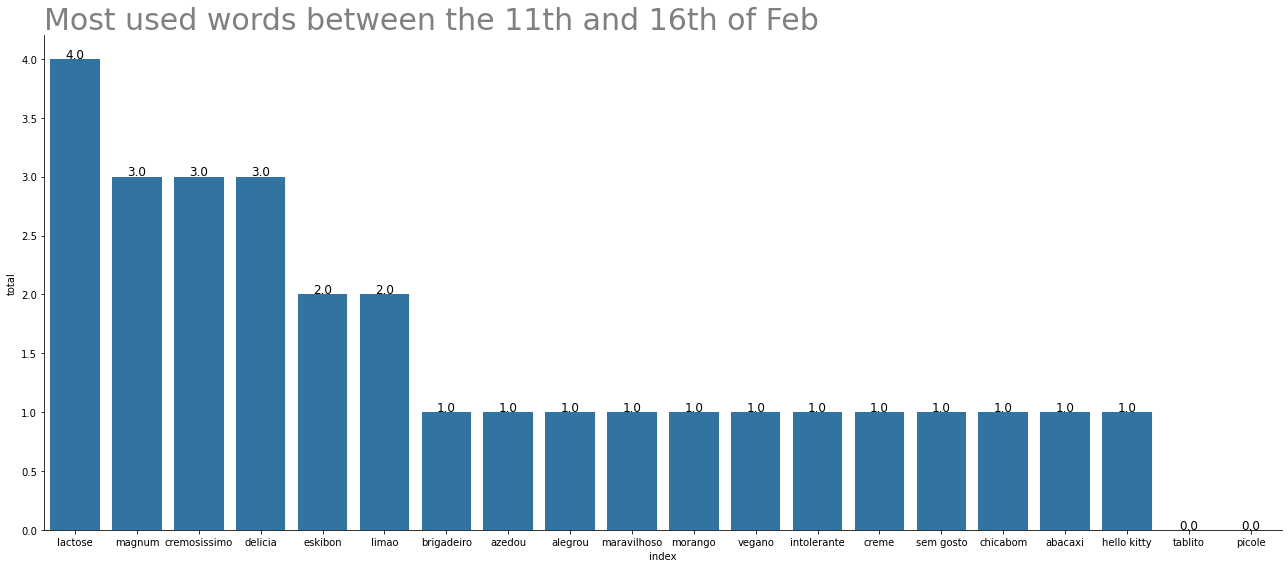

In [115]:
plt.figure(figsize=(18,8))
plot = sns.barplot(data=data,y='total',x='index',color='tab:blue',ci= False)


for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

sns.despine()
plt.title('Most used words between the 11th and 16th of Feb',color= 'Grey',size=30,loc='left')
plt.savefig('teste1.png', format='png')
plt.tight_layout()

plt.show()
